## Macroeconomic Talking Points (August 08, 2022)

### Professor Timothy H. Savage, Ph.D. CRE

#### NYU Schack Institute of Real Estate

#### Faculty Director | CREFC Center for Real Estate Finance at NYU Schack

#### Mentor | Real Estate Research Institute

#### Cheif Economist | Haystacks.AI

In [1]:
%pylab inline
from IPython.display import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


## The Prior U.S. Economic Cycle (2009 - 2019)
* Hated By Many



> Barry Ritholtz, [Why So Many People Hate This Recovery](https://www.bloomberg.com/opinion/articles/2015-11-16/why-so-many-people-hate-this-economic-recovery)

## June 2020
* Q2 2020 GDP contraction much larger than global financial crisis.
* 10-year U.S. Treasury had fallen to ~50 bps.
* NBER formally declares the U.S. to be in a recession. 

## The Current Economic Cycle (2021 - ?)

* July Jobs Report indicates that all jobs lost during the pandemic have recovered, but labor force participation remains below is pre-pandemic level.
    * The U.S. is not in a recession based on labor market performance.  Unfortunately, much of Europe likely is.
* The yield curve has declined substantially over the last month, but remains slightly positive.
* Nominal growth remains positive, while real growth dipped slightly in Q1 and Q2 2022 after a strong Q4 2021.
* Equity markets are off by about 20% from their peak. 
* Ten-year break-even (a measure of market expectations of long-term inflation) continues to fall.
* The share of the fully-vaccinated population above five years old stands at ~67% with a daily vaccination rate that is neglible.  

In [2]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01')
one_year = fred.get_series("DGS1", observation_start='1990-01-01')
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01')

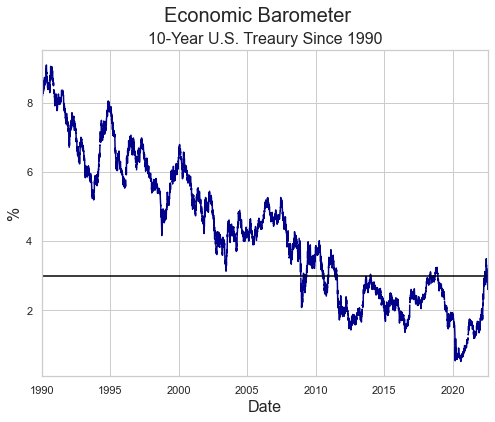

In [3]:
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('10-Year U.S. Treaury Since 1990', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(3.0, color="black")

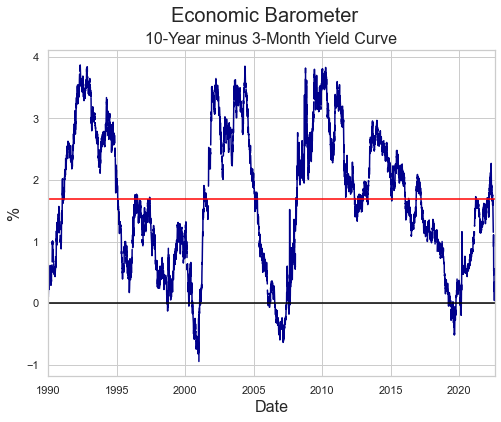

In [4]:
yield_curve = fred.get_series("T10Y3M", observation_start='1990-01-01')
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('10-Year minus 3-Month Yield Curve', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(1.685, color="red")
plt.axhline(0, color="black")

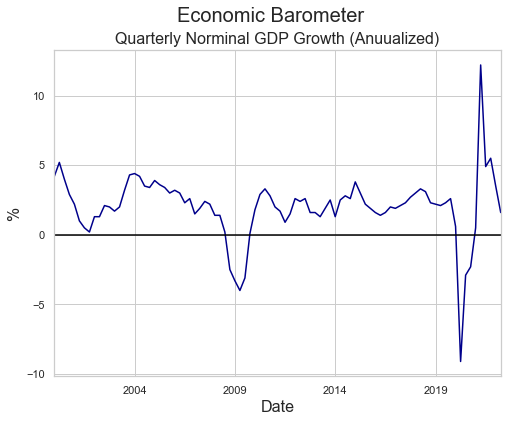

In [5]:
growth = fred.get_series("A191RO1Q156NBEA", observation_start='2000-01-01')
growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Quarterly Norminal GDP Growth (Anuualized)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color='black')

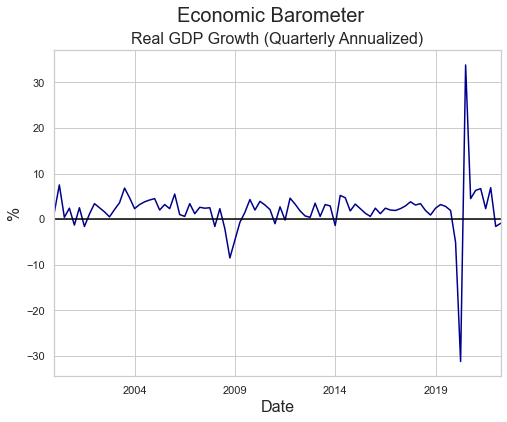

In [6]:
growth = fred.get_series("A191RL1Q225SBEA", observation_start='2000-01-01').dropna()
growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Real GDP Growth (Quarterly Annualized)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")

Text(0, 0.5, 'Tillions $')

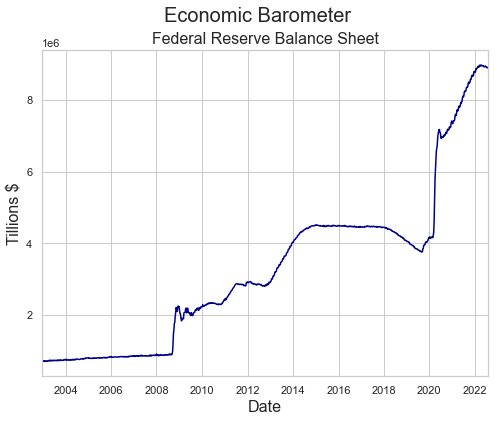

In [7]:
balance_sheet = fred.get_series("WALCL", observation_start='1990-01-01')
balance_sheet.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Federal Reserve Balance Sheet', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Tillions $', fontsize=16)

Text(0, 0.5, '')

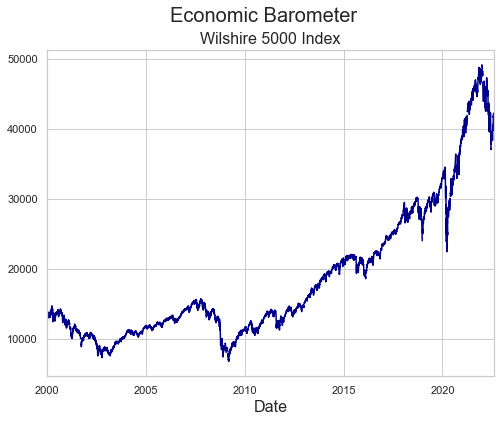

In [8]:
wilshire = fred.get_series("WILL5000PR", observation_start='2000-01-01')
wilshire.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Wilshire 5000 Index', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('', fontsize=16)

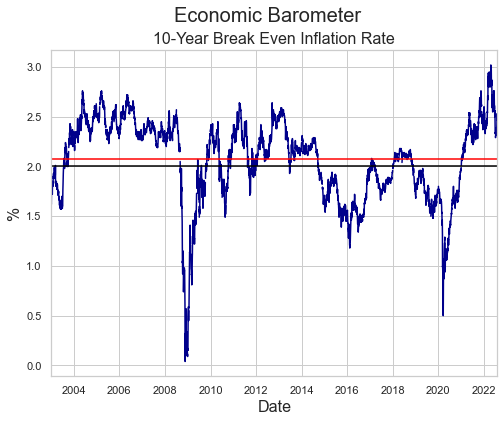

In [9]:
break_even = fred.get_series("T10YIE", observation_start='1990-01-01')
break_even.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('10-Year Break Even Inflation Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(2.07, color="red")
plt.axhline(2, color="black")

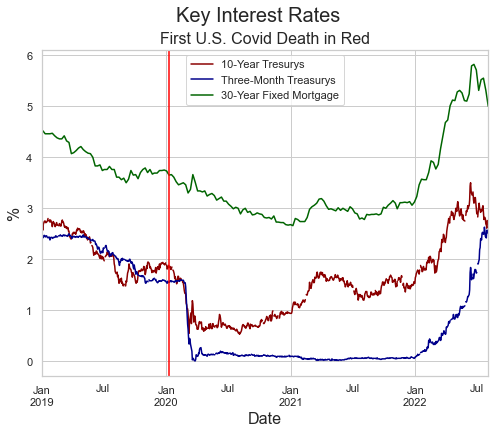

In [10]:
ten_year = fred.get_series("DGS10", observation_start='2019-01-01')
three_month = fred.get_series("DGS3MO", observation_start='2019-01-01')
ffr = fred.get_series("FEDFUNDS", observation_start='2019-01-01')
mortgage = fred.get_series("MORTGAGE30US", observation_start='2019-01-01')
yield_curve = fred.get_series("T10Y3M", observation_start='2019-01-01')

ten_year.plot(c='darkred', label='10-Year Tresurys', figsize=(8, 6), )
three_month.plot(color='darkblue', label='Three-Month Treasurys')
mortgage.plot(color='darkgreen', label='30-Year Fixed Mortgage')
plt.suptitle('Key Interest Rates', fontsize=20)
plt.title('First U.S. Covid Death in Red', fontsize=16)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 9), color="red")

Text(0, 0.5, 'Millions ($)')

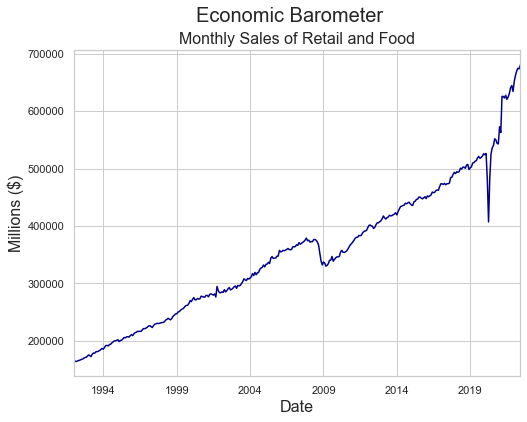

In [11]:
sales = fred.get_series("RSAFS", observation_start='1990-01-01')
sales.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Monthly Sales of Retail and Food', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions ($)', fontsize=16)

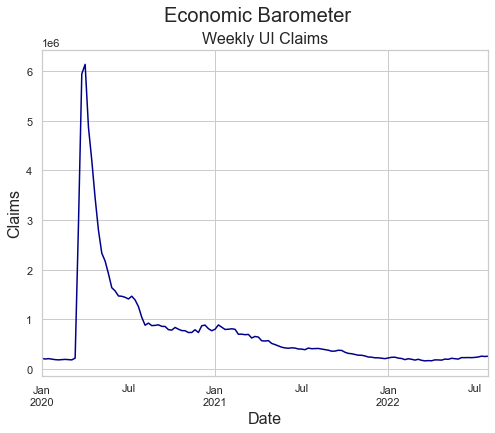

In [12]:
claims = fred.get_series("ICSA", observation_start='2020-01-01')
claims.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Weekly UI Claims', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Claims', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

Text(0, 0.5, '%')

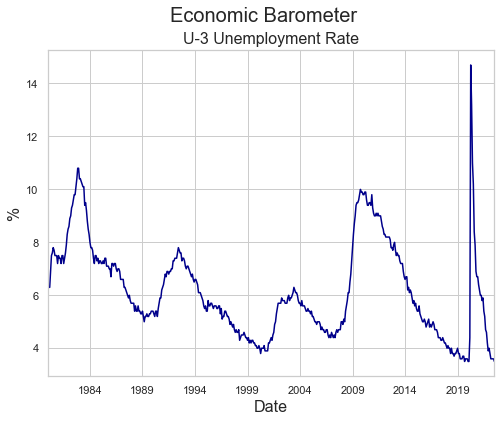

In [13]:
unemp_rate = fred.get_series("UNRATE", observation_start='1980-01-01')
unemp_rate.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('U-3 Unemployment Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

Text(0, 0.5, '%')

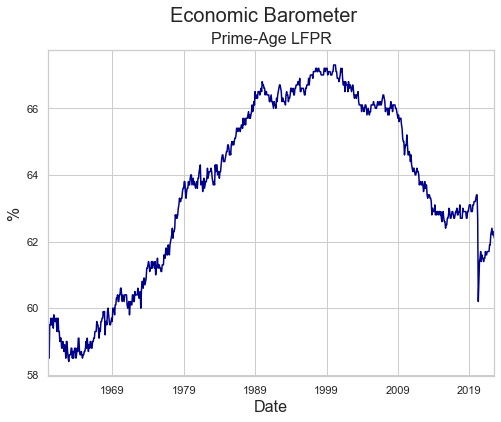

In [14]:
lfpr = fred.get_series("CIVPART", observation_start='1960-01-01')
lfpr.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Prime-Age LFPR', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

Text(0, 0.5, 'Thousands of Adults')

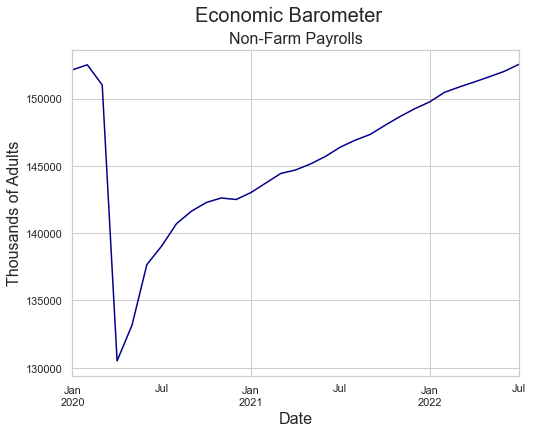

In [15]:
jobs = fred.get_series("PAYEMS", observation_start='2020-01-01')
jobs.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Non-Farm Payrolls', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Thousands of Adults', fontsize=16)

## Visualizations as Sufficient Statistics
* [Source](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations)

In [16]:
current_population = 332403650 * 0.94
vaccination = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
vaccination = vaccination[vaccination['location'] == 'United States']
vaccination = vaccination[40:]
vaccination['date'].astype(str)
vaccination['date'] = pd.to_datetime(vaccination['date'], format='%Y-%m-%d')
vaccination = vaccination.set_index('date')
vaccination['people_outstanding'] = (current_population - vaccination['people_fully_vaccinated'])
vaccination['outstanding'] = (current_population - vaccination['people_fully_vaccinated']) / current_population * 100
vaccination['rate'] = vaccination['daily_vaccinations_per_million'] / 1000000 
vaccination.tail(20)

,location,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,people_outstanding,outstanding,rate
date,,,,,,,,,,,,,,,,,,
2022-07-14,United States,USA,599757969.0,260698350.0,222489148.0,125399590.0,350492.0,248097.0,180.65,78.52,67.01,37.77,747.0,55519.0,0.017,89970283.0,28.794229,0.000747
2022-07-15,United States,USA,600155124.0,260774680.0,222529485.0,125648933.0,397155.0,262440.0,180.76,78.54,67.03,37.85,790.0,56230.0,0.017,89929946.0,28.781319,0.000790
2022-07-16,United States,USA,600360895.0,260815357.0,222550299.0,125767255.0,205771.0,271429.0,180.83,78.56,67.03,37.88,818.0,56499.0,0.017,89909132.0,28.774658,0.000818
2022-07-17,United States,USA,600474306.0,260837043.0,222562885.0,125834007.0,113411.0,277003.0,180.86,78.56,67.04,37.90,834.0,56659.0,0.017,89896546.0,28.770630,0.000834
2022-07-18,United States,USA,600820546.0,260902416.0,222599445.0,126052595.0,346240.0,290069.0,180.97,78.58,67.05,37.97,874.0,57894.0,0.017,89859986.0,28.758929,0.000874
2022-07-19,United States,USA,601160267.0,260970350.0,222636692.0,126260738.0,339721.0,297858.0,181.07,78.60,67.06,38.03,897.0,58473.0,0.018,89822739.0,28.747008,0.000897
2022-07-20,United States,USA,601483303.0,261036224.0,222674785.0,126453549.0,323036.0,296547.0,181.16,78.62,67.07,38.09,893.0,58268.0,0.018,89784646.0,28.734817,0.000893
2022-07-21,United States,USA,601828050.0,261103223.0,222715502.0,126661842.0,344747.0,295726.0,181.27,78.64,67.08,38.15,891.0,57839.0,0.017,89743929.0,28.721786,0.000891
2022-07-22,United States,USA,602216596.0,261174851.0,222762495.0,126898540.0,388546.0,294496.0,181.39,78.67,67.10,38.22,887.0,57167.0,0.017,89696936.0,28.706746,0.000887


Text(0, 0.5, '%')

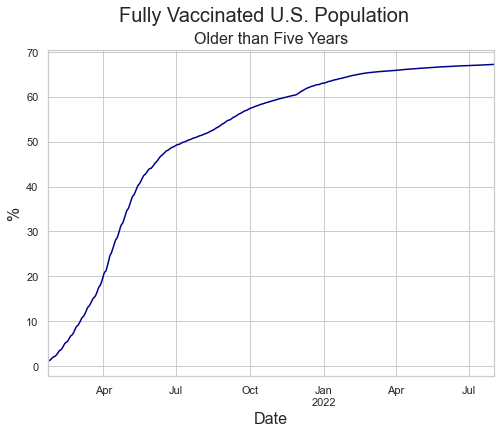

In [17]:
vaccination['people_fully_vaccinated_per_hundred'].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Fully Vaccinated U.S. Population', fontsize=20)
plt.title('Older than Five Years', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

Text(0, 0.5, '%')

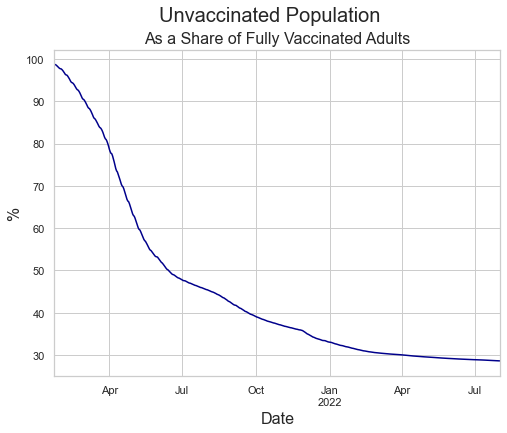

In [18]:
vaccination['outstanding'].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Unvaccinated Population', fontsize=20)
plt.title('As a Share of Fully Vaccinated Adults', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

Text(0, 0.5, '%')

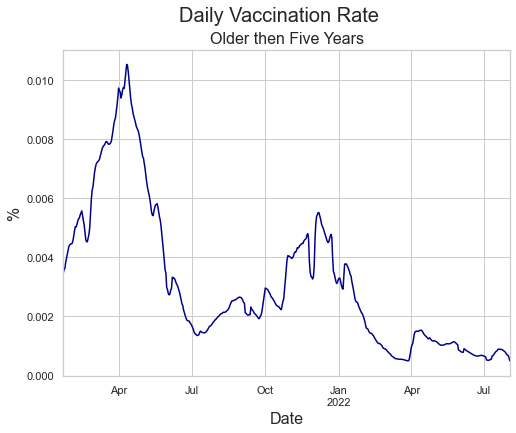

In [19]:
vaccination['rate'].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Daily Vaccination Rate', fontsize=20)
plt.title('Older then Five Years', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)